In [1]:
# Built-in dependencies
from typing import Tuple

# External dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Build Synthetic Dataset

In [2]:
N_STOCKS: int = 10
N_OBSERVATIONS: int = 252 * 10
RISK_FACTORS: Tuple = ("MARKET", "VALUE", "MOMENTUM", "SIZE")
K_FACTORS: int = len(RISK_FACTORS)

In [3]:
# Define factor return DGP parameters 
factor_returns_mu: float = 0.10 / 252
factor_returns_sigma: float = 0.15 / np.sqrt(252)

# Simulate returns
factor_returns: np.ndarray = (
    np.exp(
        np.random.normal(
            loc=factor_returns_mu - 0.5 * factor_returns_sigma ** 2, 
            scale=factor_returns_sigma, 
            size=(N_OBSERVATIONS, K_FACTORS, 1)
        )
    ) - 1
)

# Flip the sing of half of the factor returns to provide both positively and negatively returning factors
factor_returns[:, :2, :] *= -1

factor_returns, factor_returns.shape

(array([[[-0.01082849],
         [-0.00922813],
         [-0.00853377],
         [ 0.01696984]],
 
        [[ 0.00414855],
         [-0.00502989],
         [-0.00235452],
         [-0.00023492]],
 
        [[-0.00996721],
         [ 0.00991952],
         [ 0.00191426],
         [ 0.00548215]],
 
        ...,
 
        [[ 0.00322503],
         [-0.02038234],
         [ 0.00838773],
         [-0.01175704]],
 
        [[ 0.0037669 ],
         [-0.00290498],
         [ 0.00712854],
         [ 0.01344472]],
 
        [[ 0.00026429],
         [ 0.00382508],
         [ 0.00394731],
         [-0.00381865]]]),
 (2520, 4, 1))

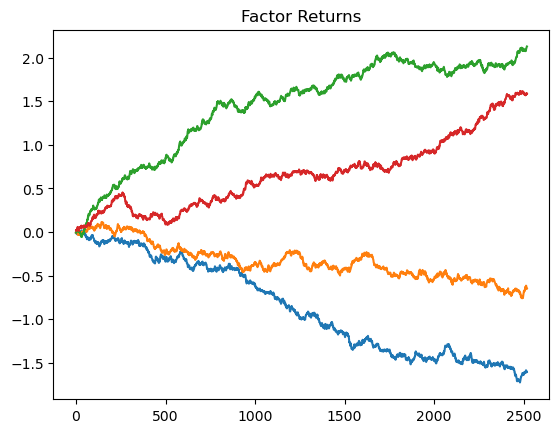

In [4]:
plt.plot(np.log(1 + factor_returns.reshape(N_OBSERVATIONS, K_FACTORS)).cumsum(axis=0))
plt.title("Factor Returns")
plt.show()

In [5]:
# On average, let stocks have positive exposure to risk factors 
stock_factor_loadings: np.ndarray = np.random.normal(loc=1, scale=0.75, size=(N_OBSERVATIONS, N_STOCKS, K_FACTORS))
stock_factor_loadings, stock_factor_loadings.shape

(array([[[-2.01312008e-01,  1.31051517e+00,  9.82569517e-01,
           6.75596895e-01],
         [ 1.40675870e+00,  8.36233992e-02,  1.52950722e+00,
           4.94107675e-01],
         [ 2.00677886e+00,  8.62218321e-01,  4.78973322e-01,
           1.62610004e+00],
         ...,
         [ 1.56168281e+00,  4.87129251e-01,  9.97737025e-02,
           8.24559843e-01],
         [ 8.99173167e-01,  9.23614814e-01,  1.12354592e+00,
           1.36667732e+00],
         [ 1.35301541e+00,  6.61746630e-01,  1.14719528e+00,
           8.22563522e-02]],
 
        [[ 1.13816612e+00,  1.97944954e+00,  3.57093868e-01,
           1.80254075e+00],
         [ 9.19965999e-01,  7.88799573e-01,  9.01600928e-01,
           1.40401207e+00],
         [ 1.84350867e+00,  1.27364079e+00,  1.25323705e+00,
           1.69256928e+00],
         ...,
         [ 1.01499305e+00,  9.26097889e-01,  6.48417647e-01,
           2.28948420e-01],
         [-6.20723392e-01,  4.83504272e-01,  1.18054949e+00,
           1.24964

In [6]:
# Simulate irreducable/idiosyncratic noise 
stock_return_noise: np.ndarray = np.random.normal(loc=0.00, scale=0.05 / np.sqrt(252), size=(N_OBSERVATIONS, N_STOCKS))
stock_return_noise

array([[-3.18835625e-03,  4.41697797e-03, -2.23436314e-03, ...,
        -5.24430294e-03, -6.27914606e-03, -2.05730872e-03],
       [ 4.13874142e-03, -5.06302677e-03,  1.36087926e-03, ...,
        -1.95844316e-03, -3.86220842e-03,  8.54401769e-03],
       [-1.14160790e-03, -1.80088486e-03,  3.46635354e-04, ...,
        -2.83080868e-03,  1.01110289e-03, -2.65716845e-03],
       ...,
       [-3.32747088e-03, -6.59364123e-04, -2.06588586e-03, ...,
        -6.25218193e-04, -1.06261356e-03,  4.25931670e-03],
       [ 1.15998424e-03,  6.11505776e-03,  1.15648981e-03, ...,
         4.24404275e-03, -4.68671992e-03, -2.84868014e-03],
       [-2.83705235e-03, -4.10222027e-03,  1.14600005e-03, ...,
        -2.45461935e-03,  9.38341708e-05,  9.78899373e-04]])

In [7]:
# Construct panel of stock returns from factor loadings, factor returns, and idiosyncratic returns
stock_returns: np.ndarray = np.matmul(stock_factor_loadings, factor_returns).reshape(N_OBSERVATIONS, N_STOCKS) + stock_return_noise
stock_returns

array([[-0.01002231, -0.01625532, -0.0084142 , ..., -0.01350905,
        -0.01093486, -0.03120913],
       [-0.00236016, -0.00766674, -0.00074589, ..., -0.00398635,
        -0.01194248,  0.00910144],
       [-0.0022217 , -0.01299881,  0.00817743, ...,  0.01717243,
         0.00058455, -0.00799785],
       ...,
       [-0.0336182 , -0.04318619,  0.00055078, ...,  0.01487707,
        -0.02373309, -0.03623499],
       [ 0.02027234,  0.01820951,  0.02235225, ...,  0.01830745,
         0.01326924,  0.02303004],
       [ 0.00642103, -0.00252225,  0.01221564, ...,  0.00634848,
         0.00368309,  0.00197113]])

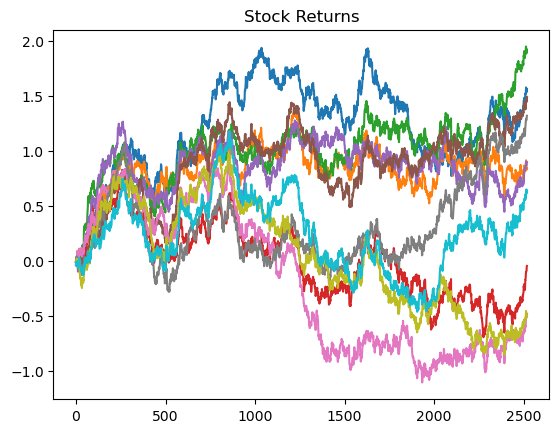

In [8]:
plt.plot(np.log(1 + stock_returns).cumsum(axis=0))
plt.title("Stock Returns")
plt.show()

In [9]:
stock_covariance_matrix: np.ndarray = (
    (stock_returns - stock_returns.mean(axis=0)).T 
    @ ((stock_returns - stock_returns.mean(axis=0))) 
    / (N_OBSERVATIONS - 1)
)
stock_covariance_matrix, stock_covariance_matrix.shape

(array([[0.00054707, 0.00034602, 0.00035599, 0.00036095, 0.00035349,
         0.00033772, 0.00034112, 0.00034263, 0.00034371, 0.00034561],
        [0.00034602, 0.00056738, 0.00035293, 0.00035789, 0.00035313,
         0.00034603, 0.00034713, 0.0003467 , 0.00034548, 0.00034563],
        [0.00035599, 0.00035293, 0.00057548, 0.00036214, 0.00034626,
         0.00035011, 0.00034144, 0.00036174, 0.00034247, 0.00035093],
        [0.00036095, 0.00035789, 0.00036214, 0.00057393, 0.00035903,
         0.00035495, 0.00035708, 0.00035959, 0.0003449 , 0.00035466],
        [0.00035349, 0.00035313, 0.00034626, 0.00035903, 0.00056881,
         0.00035172, 0.00035632, 0.00035911, 0.00034907, 0.00035399],
        [0.00033772, 0.00034603, 0.00035011, 0.00035495, 0.00035172,
         0.0005503 , 0.00034064, 0.00033751, 0.00033546, 0.00034802],
        [0.00034112, 0.00034713, 0.00034144, 0.00035708, 0.00035632,
         0.00034064, 0.00056802, 0.00034906, 0.0003376 , 0.00034307],
        [0.00034263, 0.0003

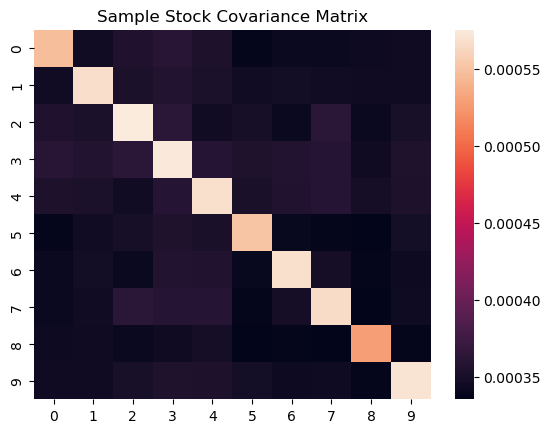

In [10]:
sns.heatmap(data=stock_covariance_matrix)
plt.title("Sample Stock Covariance Matrix")
plt.show()

# Execute Stock Return Singular Value Decomposition Manually

In [11]:
# Execute SVD and convert the singular value vector into a diagonal matrix
U, S, V_T = np.linalg.svd(a=stock_returns)
S = np.diag(S)

# Get the shapes of the stock returns vector to facilitate return reconstruction
m, n = stock_returns.shape

U.shape, S.shape, V_T.shape, m, n

((2520, 2520), (10, 10), (10, 10), 2520, 10)

In [12]:
svd_reconstructed_returns: np.ndarray = U[:, :n] @ S @ V_T[:m, :]
svd_reconstructed_returns, svd_reconstructed_returns.shape

(array([[-0.01002231, -0.01625532, -0.0084142 , ..., -0.01350905,
         -0.01093486, -0.03120913],
        [-0.00236016, -0.00766674, -0.00074589, ..., -0.00398635,
         -0.01194248,  0.00910144],
        [-0.0022217 , -0.01299881,  0.00817743, ...,  0.01717243,
          0.00058455, -0.00799785],
        ...,
        [-0.0336182 , -0.04318619,  0.00055078, ...,  0.01487707,
         -0.02373309, -0.03623499],
        [ 0.02027234,  0.01820951,  0.02235225, ...,  0.01830745,
          0.01326924,  0.02303004],
        [ 0.00642103, -0.00252225,  0.01221564, ...,  0.00634848,
          0.00368309,  0.00197113]]),
 (2520, 10))

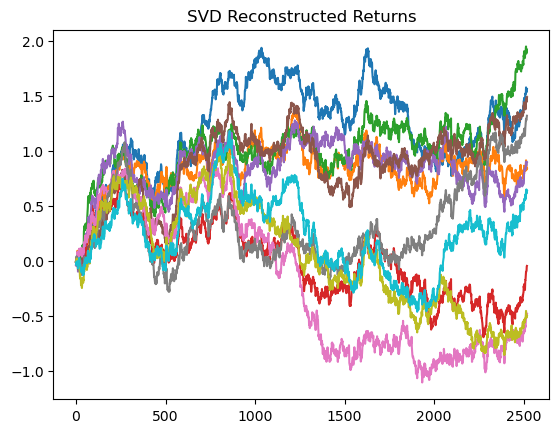

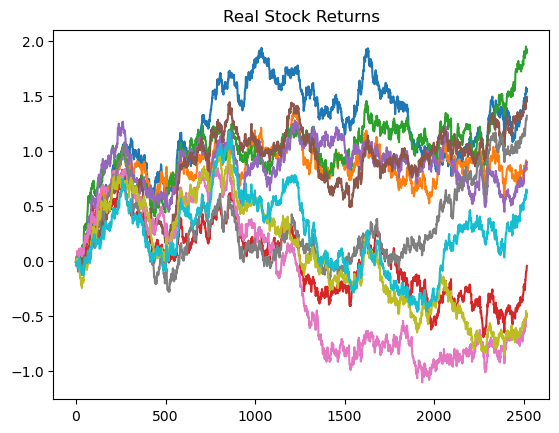

MSE = 1.8501580709773915e-33


In [13]:
plt.plot(np.log(1 + svd_reconstructed_returns).cumsum(axis=0))
plt.title("SVD Reconstructed Returns")
plt.show()

plt.plot(np.log(1 + stock_returns).cumsum(axis=0))
plt.title("Real Stock Returns")
plt.show()

mse: float = np.mean(np.square(svd_reconstructed_returns - stock_returns))
print(f"MSE = {mse}")

# Execute Stock Return Singular Value Decomposition Systematically

In [14]:
# Execute SVD with the "full_matrices" to circumvent the need to manually reshape the singular vectors
U, S, V_T = np.linalg.svd(a=stock_returns, full_matrices=False)
S = np.diag(S)

U.shape, S.shape, V_T.shape

((2520, 10), (10, 10), (10, 10))

In [15]:
svd_reconstructed_returns: np.ndarray = U @ S @ V_T
svd_reconstructed_returns, svd_reconstructed_returns.shape

(array([[-0.01002231, -0.01625532, -0.0084142 , ..., -0.01350905,
         -0.01093486, -0.03120913],
        [-0.00236016, -0.00766674, -0.00074589, ..., -0.00398635,
         -0.01194248,  0.00910144],
        [-0.0022217 , -0.01299881,  0.00817743, ...,  0.01717243,
          0.00058455, -0.00799785],
        ...,
        [-0.0336182 , -0.04318619,  0.00055078, ...,  0.01487707,
         -0.02373309, -0.03623499],
        [ 0.02027234,  0.01820951,  0.02235225, ...,  0.01830745,
          0.01326924,  0.02303004],
        [ 0.00642103, -0.00252225,  0.01221564, ...,  0.00634848,
          0.00368309,  0.00197113]]),
 (2520, 10))

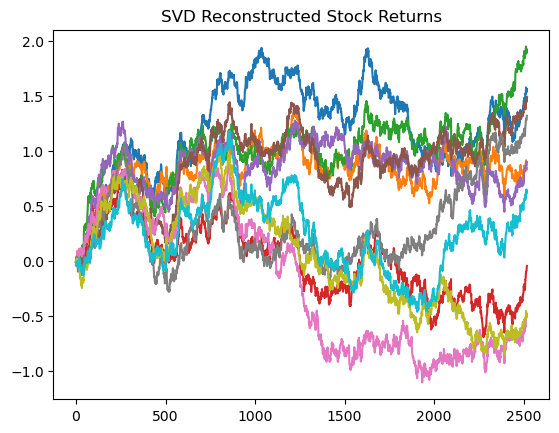

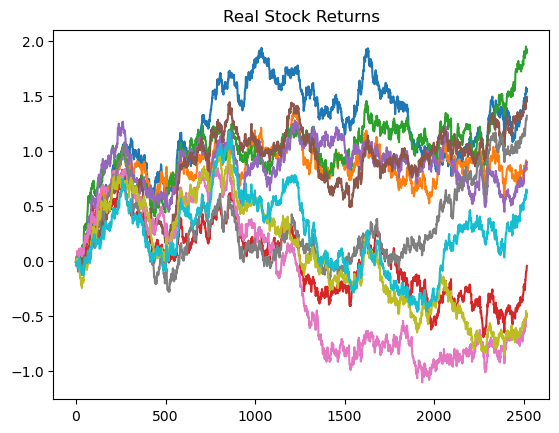

MSE = 1.8469756948803495e-33


In [16]:
plt.plot(np.log(1 + svd_reconstructed_returns).cumsum(axis=0))
plt.title("SVD Reconstructed Stock Returns")
plt.show()

plt.plot(np.log(1 + stock_returns).cumsum(axis=0))
plt.title("Real Stock Returns")
plt.show()

mse: float = np.mean(np.square(svd_reconstructed_returns - stock_returns))
print(f"MSE = {mse}")

In [17]:
# Calculate scaled principle component scores / returns from stock returns and principle component loadings
svd_principle_component_returns: np.ndarray = stock_returns @ V_T.T
svd_principle_component_returns, svd_principle_component_returns.shape

(array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
         -0.01428089,  0.01234141],
        [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
          0.00572339,  0.00291914],
        [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
         -0.00483633, -0.00551064],
        ...,
        [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
          0.00998282, -0.02925373],
        [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
         -0.00094663,  0.00647788],
        [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
         -0.00046115, -0.00127025]]),
 (2520, 10))

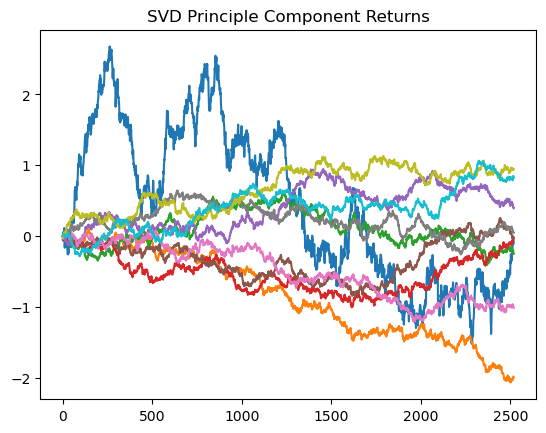

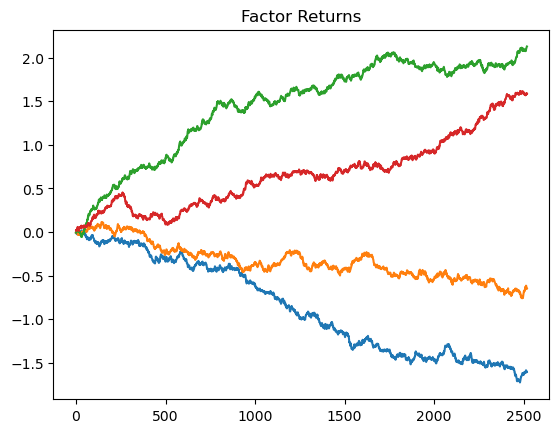

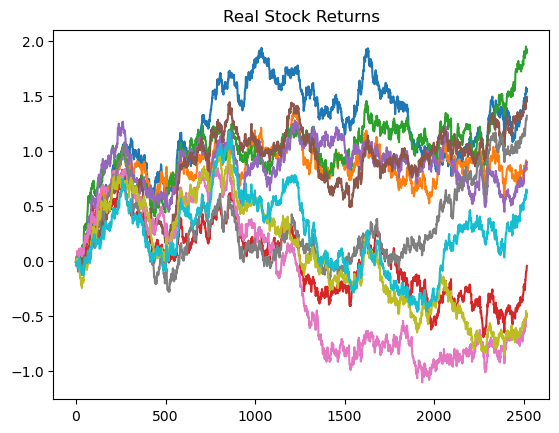

In [18]:
plt.plot(np.log(1 + svd_principle_component_returns).cumsum(axis=0))
plt.title("SVD Principle Component Returns")
plt.show()

plt.plot(np.log(1 + factor_returns.reshape(N_OBSERVATIONS, K_FACTORS)).cumsum(axis=0))
plt.title("Factor Returns")
plt.show()

plt.plot(np.log(1 + stock_returns).cumsum(axis=0))
plt.title("Real Stock Returns")
plt.show()

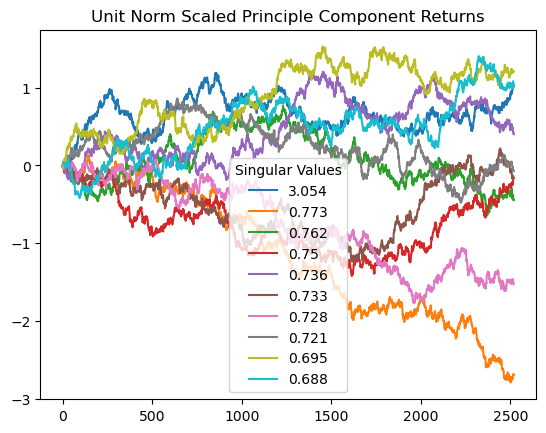

In [19]:
# Scale each principle component return by its norm such that each time series is unit norm
pd.DataFrame(np.log(1 + svd_principle_component_returns / np.linalg.norm(svd_principle_component_returns, axis=0)).cumsum(axis=0), columns=np.diag(S).round(3)).plot()
plt.title("Unit Norm Scaled Principle Component Returns")
plt.legend(title="Singular Values")
plt.show()

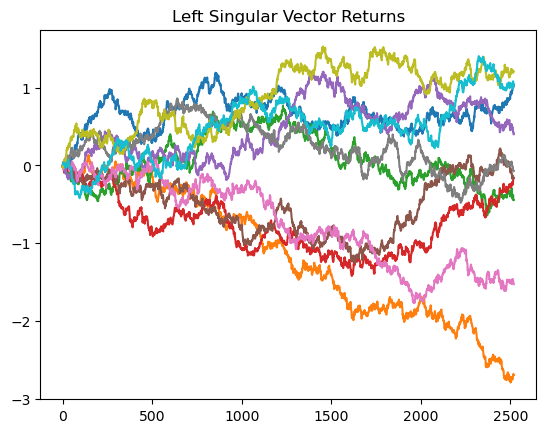

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
# Unit norm principle component returns are simply the left singular vectors
plt.plot(np.log(1 + U).cumsum(axis=0))
plt.title("Left Singular Vector Returns")
plt.show()
np.linalg.norm(U, axis=0)

# Show the equivalency relation between:

R @ T = U @ S @ V_T @ V = U @ S

In [21]:
stock_returns @ V_T.T

array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
        -0.01428089,  0.01234141],
       [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
         0.00572339,  0.00291914],
       [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
        -0.00483633, -0.00551064],
       ...,
       [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
         0.00998282, -0.02925373],
       [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
        -0.00094663,  0.00647788],
       [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
        -0.00046115, -0.00127025]])

In [22]:
U @ S @ V_T @ V_T.T

array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
        -0.01428089,  0.01234141],
       [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
         0.00572339,  0.00291914],
       [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
        -0.00483633, -0.00551064],
       ...,
       [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
         0.00998282, -0.02925373],
       [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
        -0.00094663,  0.00647788],
       [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
        -0.00046115, -0.00127025]])

In [23]:
U @ S @ np.identity(n=V_T.shape[0])

array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
        -0.01428089,  0.01234141],
       [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
         0.00572339,  0.00291914],
       [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
        -0.00483633, -0.00551064],
       ...,
       [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
         0.00998282, -0.02925373],
       [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
        -0.00094663,  0.00647788],
       [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
        -0.00046115, -0.00127025]])

In [24]:
U @ S

array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
        -0.01428089,  0.01234141],
       [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
         0.00572339,  0.00291914],
       [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
        -0.00483633, -0.00551064],
       ...,
       [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
         0.00998282, -0.02925373],
       [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
        -0.00094663,  0.00647788],
       [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
        -0.00046115, -0.00127025]])

In [25]:
stock_returns @ V_T.T

array([[-0.05233193, -0.01878762, -0.00519303, ...,  0.00223003,
        -0.01428089,  0.01234141],
       [-0.00862119, -0.00492448,  0.00977024, ..., -0.00297675,
         0.00572339,  0.00291914],
       [ 0.01595619, -0.00723656, -0.01343409, ..., -0.01181039,
        -0.00483633, -0.00551064],
       ...,
       [-0.04217266,  0.00415125, -0.04810847, ..., -0.0078516 ,
         0.00998282, -0.02925373],
       [ 0.07637977,  0.00020209,  0.00627349, ..., -0.00606363,
        -0.00094663,  0.00647788],
       [ 0.0106482 , -0.01105837, -0.00337185, ...,  0.00213835,
        -0.00046115, -0.00127025]])

# Construct an SVD/PCA Factor Risk Model

Now that we understand how to use SVD to decompose returns, let's use SVD as a factor risk model to construct a low-rank approximation of the stock-level covariance matrix.

In [26]:
# Demean returns to faciliate proper covariance matrix construction (standard PCA assumption)
demeaned_stock_returns: np.ndarray = stock_returns - stock_returns.mean(axis=0)
demeaned_stock_returns.mean(axis=0).round(3)

array([-0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0.])

In [27]:
# Execute SVD on demeaned returns
U, S, V_T = np.linalg.svd(a=demeaned_stock_returns, full_matrices=False)
S: np.ndarray = np.diag(S)

U.shape, S.shape, V_T.shape

((2520, 10), (10, 10), (10, 10))

# SVD Stock Covariance Reconstruction Derivation

$$
\Sigma_{stock} = \frac{(R - \mathbb{E}[R])'(R - \mathbb{E}[R])}{N - 1} = \frac{R^{*'} R^{*}}{N - 1}
$$

$$
R^{*} = U \Sigma_{SVD} V'
$$

$$
U'U = V'V = \mathbb{I}
$$

$$
\therefore \Sigma_{stock} = \frac{(U \Sigma_{SVD} V')'(U \Sigma_{SVD} V')}{N - 1}
$$

$$
= \frac{(V \Sigma_{SVD} U')(U \Sigma_{SVD} V')}{N - 1}
$$

$$
= \frac{V \Sigma_{SVD} U' U \Sigma_{SVD} V'}{N - 1}
$$

$$
= \frac{V \Sigma_{SVD}^{2} V'}{N - 1}
$$

Now that we know that the stock covariance matrix is R'R / (N - 1), let's reconstruct it via V S^2 V_T / (N - 1)

In [28]:
# Manually calculate the sample covariance matrix
manual_stock_covariance_matrix: np.ndarray = (demeaned_stock_returns.T @ demeaned_stock_returns) / (N_OBSERVATIONS - 1)

# Systematically calcualte the sample covariance matrix
systematic_stock_covariance_matrix: np.ndarray = np.cov(stock_returns, rowvar=False, ddof=1)

# Assert equivalance between the manual and systematic stock covariance matrix
assert np.allclose(a=manual_stock_covariance_matrix, b=systematic_stock_covariance_matrix)

# Formally store the stock covariance matrix
stock_covariance_matrix: np.array = systematic_stock_covariance_matrix.copy()
stock_covariance_matrix, stock_covariance_matrix.shape

(array([[0.00054707, 0.00034602, 0.00035599, 0.00036095, 0.00035349,
         0.00033772, 0.00034112, 0.00034263, 0.00034371, 0.00034561],
        [0.00034602, 0.00056738, 0.00035293, 0.00035789, 0.00035313,
         0.00034603, 0.00034713, 0.0003467 , 0.00034548, 0.00034563],
        [0.00035599, 0.00035293, 0.00057548, 0.00036214, 0.00034626,
         0.00035011, 0.00034144, 0.00036174, 0.00034247, 0.00035093],
        [0.00036095, 0.00035789, 0.00036214, 0.00057393, 0.00035903,
         0.00035495, 0.00035708, 0.00035959, 0.0003449 , 0.00035466],
        [0.00035349, 0.00035313, 0.00034626, 0.00035903, 0.00056881,
         0.00035172, 0.00035632, 0.00035911, 0.00034907, 0.00035399],
        [0.00033772, 0.00034603, 0.00035011, 0.00035495, 0.00035172,
         0.0005503 , 0.00034064, 0.00033751, 0.00033546, 0.00034802],
        [0.00034112, 0.00034713, 0.00034144, 0.00035708, 0.00035632,
         0.00034064, 0.00056802, 0.00034906, 0.0003376 , 0.00034307],
        [0.00034263, 0.0003

In [40]:
# Calculate the principle component / factor covariance matrix by squaring the singular value matrix
factor_covariance_matrix: np.ndarray = S @ S / (N_OBSERVATIONS - 1)
factor_covariance_matrix, factor_covariance_matrix.shape

(array([[0.00369962, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.00023654, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.00023034, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00022335, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00021522,
         0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00021326, 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.00021049, 0.        , 0.        , 0.        ],
        [0.        , 0.    

In [41]:
# Explicitly define factor loadings from V_T
factor_loadings: np.ndarray = V_T.T
factor_loadings, factor_loadings.shape

(array([[ 0.31398209,  0.13867896, -0.02724082, -0.11176926,  0.02897182,
          0.61749826,  0.26163808,  0.13157625, -0.14381089, -0.616731  ],
        [ 0.31703212, -0.02318958, -0.05840735, -0.70296696,  0.20178125,
         -0.45968698,  0.2231207 , -0.24522051, -0.1818085 , -0.07988015],
        [ 0.3198672 ,  0.67463262,  0.17652737,  0.03507539, -0.15074556,
         -0.12900691, -0.00082588,  0.43076343, -0.28532318,  0.3222258 ],
        [ 0.32399894,  0.07163291,  0.10260192, -0.0502138 , -0.42403938,
          0.35273499, -0.07198362, -0.67203004,  0.02347324,  0.33949442],
        [ 0.32086905, -0.37239801, -0.00269825,  0.14000088,  0.54153099,
          0.22922471, -0.28060661,  0.05311186, -0.46411426,  0.30982655],
        [ 0.31199592,  0.00723686, -0.3440195 , -0.06502348, -0.2222828 ,
         -0.15443962, -0.7657854 ,  0.09168317,  0.12222569, -0.31144062],
        [ 0.31461261, -0.60045969,  0.3099423 ,  0.07192301, -0.51020111,
         -0.1714399 ,  0.1999846

In [42]:
# Caclulate the stock-level covariance matrix from the factor covariance and loadings matrices
svd_reconstructed_stock_covariance_matrix: np.ndarray = factor_loadings @ factor_covariance_matrix @ factor_loadings.T
svd_reconstructed_stock_covariance_matrix, svd_reconstructed_stock_covariance_matrix.shape

(array([[0.00054707, 0.00034602, 0.00035599, 0.00036095, 0.00035349,
         0.00033772, 0.00034112, 0.00034263, 0.00034371, 0.00034561],
        [0.00034602, 0.00056738, 0.00035293, 0.00035789, 0.00035313,
         0.00034603, 0.00034713, 0.0003467 , 0.00034548, 0.00034563],
        [0.00035599, 0.00035293, 0.00057548, 0.00036214, 0.00034626,
         0.00035011, 0.00034144, 0.00036174, 0.00034247, 0.00035093],
        [0.00036095, 0.00035789, 0.00036214, 0.00057393, 0.00035903,
         0.00035495, 0.00035708, 0.00035959, 0.0003449 , 0.00035466],
        [0.00035349, 0.00035313, 0.00034626, 0.00035903, 0.00056881,
         0.00035172, 0.00035632, 0.00035911, 0.00034907, 0.00035399],
        [0.00033772, 0.00034603, 0.00035011, 0.00035495, 0.00035172,
         0.0005503 , 0.00034064, 0.00033751, 0.00033546, 0.00034802],
        [0.00034112, 0.00034713, 0.00034144, 0.00035708, 0.00035632,
         0.00034064, 0.00056802, 0.00034906, 0.0003376 , 0.00034307],
        [0.00034263, 0.0003

In [43]:
# Assert equivalance between the SVD and sample stock covariance matrices
assert np.allclose(a=svd_reconstructed_stock_covariance_matrix, b=stock_covariance_matrix)

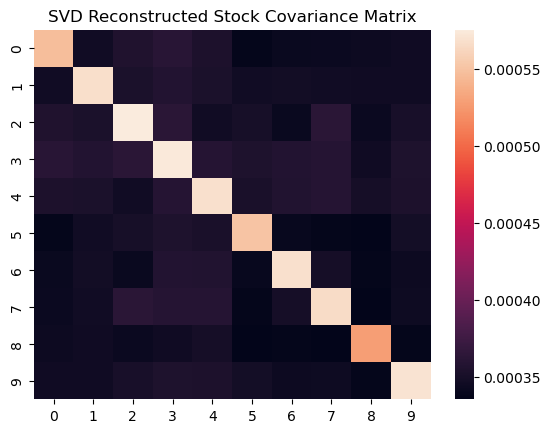

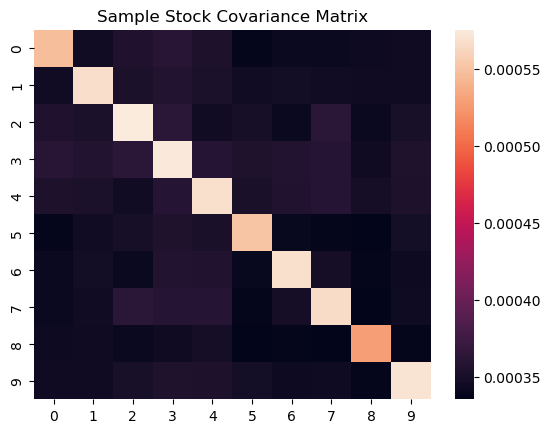

In [44]:
sns.heatmap(data=svd_reconstructed_stock_covariance_matrix)
plt.title("SVD Reconstructed Stock Covariance Matrix")
plt.show()

sns.heatmap(data=stock_covariance_matrix)
plt.title("Sample Stock Covariance Matrix")
plt.show()

# Construct a Low-Rank Approximation of the Stock Covariance Matrix

In [45]:
# Determine the number of factors that explains 90% of stock return variation
total_variance: float = np.trace(S @ S / (N_OBSERVATIONS - 1))
proportional_variance: np.ndarray = np.diag(S @ S / (N_OBSERVATIONS - 1)) / total_variance
k_principle_components: int = np.where(proportional_variance.cumsum() < 0.9)[0][-1]
k_principle_components

6

In [49]:
k_factor_covariance_matrix: np.ndarray = (
    S[:k_principle_components, :k_principle_components] 
    @ S[:k_principle_components, :k_principle_components]
    / (N_OBSERVATIONS - 1)
)
k_factor_covariance_matrix.shape

(6, 6)

In [50]:
k_factor_loadings: np.ndarray = V_T.T[:, :k_principle_components]
k_factor_loadings.shape

(10, 6)

In [51]:
k_factor_stock_covariance_matrix: np.ndarray = k_factor_loadings @ k_factor_covariance_matrix @ k_factor_loadings.T
k_factor_stock_covariance_matrix, k_factor_stock_covariance_matrix.shape

(array([[0.00045373, 0.00032615, 0.00037378, 0.00042313, 0.00039059,
         0.00034471, 0.00031626, 0.00032569, 0.00038904, 0.00032959],
        [0.00032615, 0.00053696, 0.00036969, 0.00033313, 0.00035749,
         0.00038622, 0.00035149, 0.00034171, 0.00038668, 0.00032079],
        [0.00037378, 0.00036969, 0.00050207, 0.00040268, 0.0002974 ,
         0.00036733, 0.00031092, 0.00041811, 0.00033679, 0.00036123],
        [0.00042313, 0.00033313, 0.00040268, 0.0004578 , 0.00034449,
         0.00037537, 0.00040713, 0.00034101, 0.00036296, 0.00034157],
        [0.00039059, 0.00035749, 0.0002974 , 0.00034449, 0.0004924 ,
         0.00033445, 0.00036058, 0.00040086, 0.00039829, 0.00037782],
        [0.00034471, 0.00038622, 0.00036733, 0.00037537, 0.00033445,
         0.00040406, 0.00036657, 0.00030866, 0.00034741, 0.00041581],
        [0.00031626, 0.00035149, 0.00031092, 0.00040713, 0.00036058,
         0.00036657, 0.00053705, 0.00037052, 0.00032462, 0.000335  ],
        [0.00032569, 0.0003

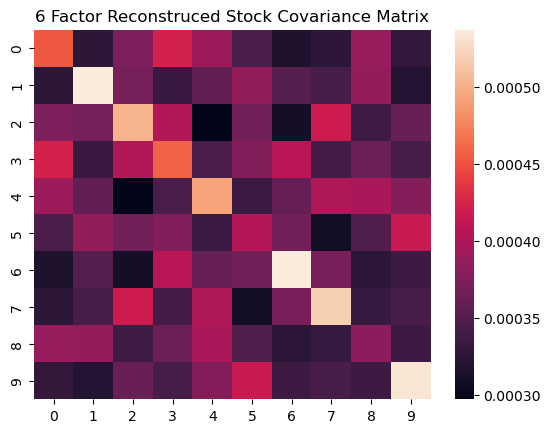

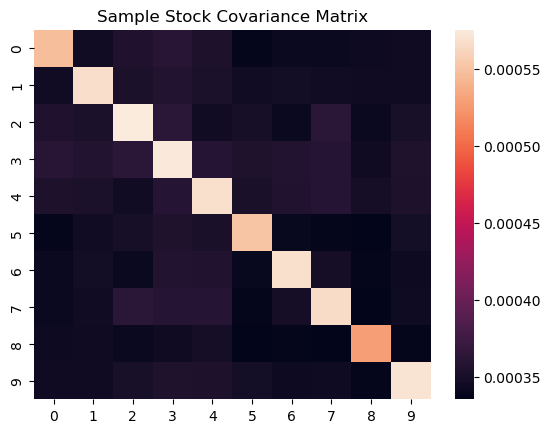

In [52]:
sns.heatmap(data=k_factor_stock_covariance_matrix)
plt.title(f"{k_principle_components} Factor Reconstruced Stock Covariance Matrix")
plt.show()

sns.heatmap(data=stock_covariance_matrix)
plt.title(f"Sample Stock Covariance Matrix")
plt.show()

# SVD vs. EVD

How does Singular Value Decomposition relate to Eigenvalue Decomposition?

$$
\text{Let $A$ be a centered square $T$x$N$ matrix:}
$$

$$
A = SVD(A) = U \Sigma V'
$$

$$
A'A = EVD(A'A) = V \Lambda V' = V \Sigma^{2} V'
$$

$$
\text{Where $\Sigma$ represents the diagonal matrix of the singular values of $A$ and $\Lambda$ represents the eigenvalues of $A'A$}
$$

$$
\text{Let the sample covariance matrix be } \hat{\Sigma} = \frac{A'A}{T - 1}
$$

$$
\hat{\Sigma} = EVD(\hat{\Sigma}) = V \frac{\Sigma^{2}}{T - 1} V'
$$